### Name: Brian Beadell

## Overview
In this assignment I will analyze the performance of linear and polynomial regression models when applied to a non-linear dataset. 

### Data
The data used for this assignment was generated using a specific equation, with the inclusion of random noise. By the conclusion of this assignment, I will approximate the original coefficients used in creating the data with a high degree of accuracy. Nonetheless, owing to the presence of this added noise in the dataset, our models may get very close to identifying the "true model parameters," but they will not be exact. This underscores the fact that inherent noise in datasets typically prevent our models from precisely finding the true parameters - although they can sometimes get very close.

## Standard Imports<a name="import"></a>


In [1]:
# standard imports
import pandas as pd
import numpy as np

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)

## Get the Data


In [2]:
prd=pd.read_csv("polynomial_regression_data.csv")

In [3]:
prd.head()

,feature_1,feature_2,target
0,-3.319120,-3.435105,-838.213535
1,8.812980,8.637521,265.917562
2,-19.995425,-20.929340,5848.873245
3,-7.906697,-8.439717,75.408279
4,-14.129764,-15.556320,2759.345849


In [4]:
# check descriptive statistics
# note the mean target value for later in the project when comparing RMSE

prd.describe()

,feature_1,feature_2,target
count,500.000000,500.000000,500.000000
mean,0.331085,0.370986,1288.140419
std,11.873084,11.957826,2023.696714
min,-19.995425,-20.929340,-1016.790557
25%,-10.024144,-10.387657,-574.059332
50%,1.336373,1.350543,759.116940
75%,10.688729,10.652467,2877.344880
max,19.892914,21.232477,6367.691029


This dataset comprises two features identified as `feature_1` and `feature_2`, in addition to the `target` column. The data consists of 500 instances.

In [5]:
#Import train_test_split
from sklearn.model_selection import train_test_split

X=prd[['feature_1', 'feature_2']] #Assign feature 1 & feature 2 to X
y=prd['target'] #Assign the target column to y

#Assign names to resulting DataFrames, allocate 80/20 train/test split, set random_state to 42.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


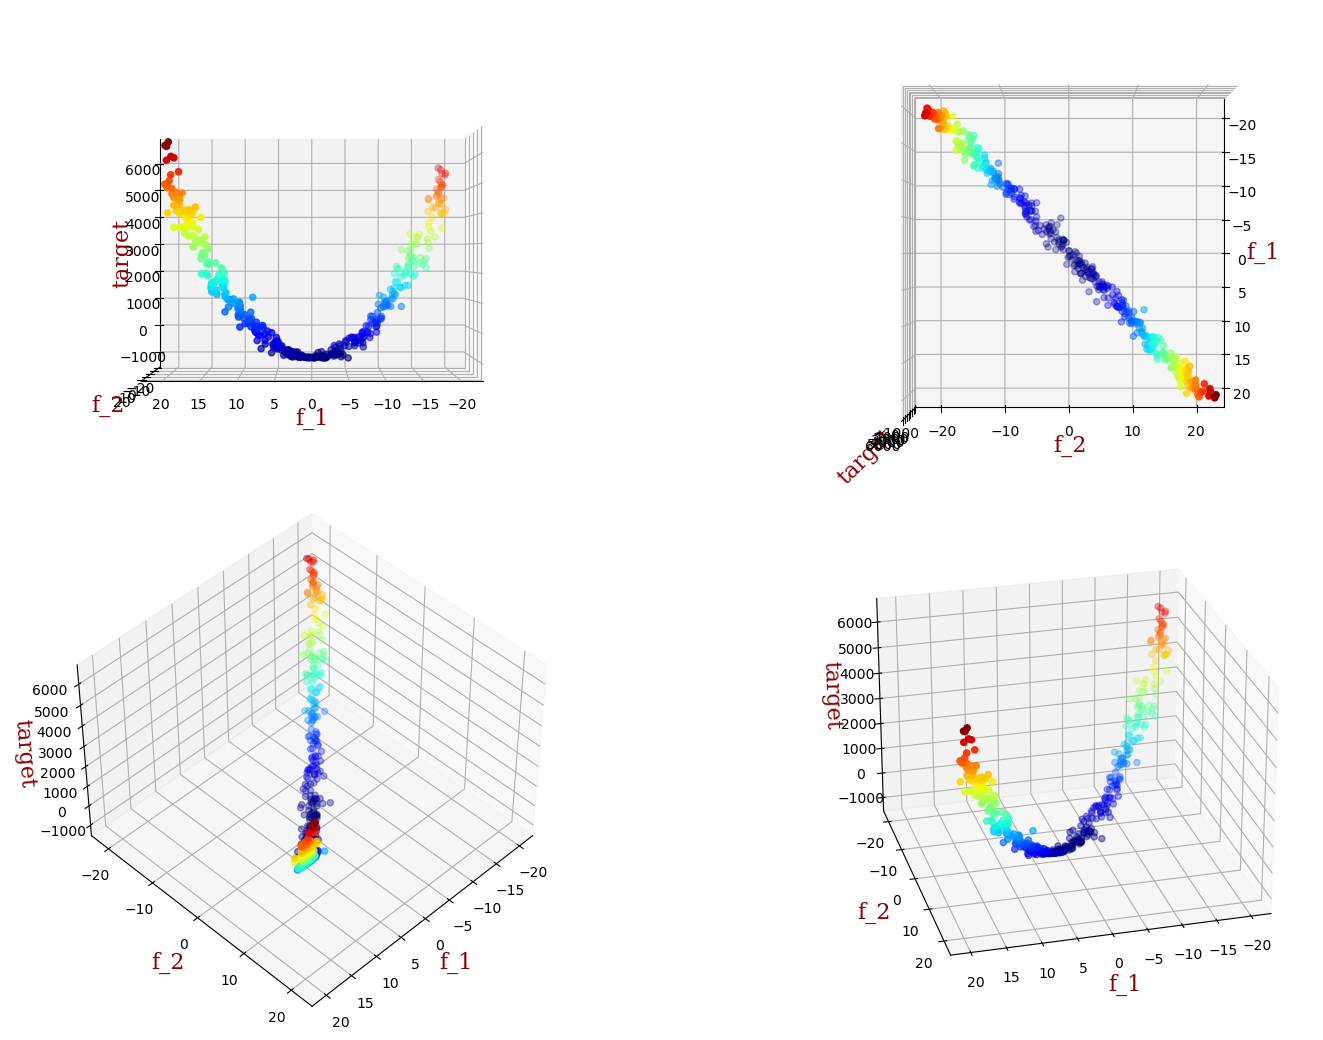

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# setup the data
feature_1 = X_train['feature_1']
feature_2 = X_train['feature_2']
target = y_train

fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');

ax.set_xlabel('f_1',fontdict=font)
ax.set_ylabel('f_2',fontdict=font)
ax.set_zlabel('target',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## Train Linear Regression Model
From the plots above, it's evident that our data doesn't exhibit a linear relationship. Nonetheless, in the following code section, we will apply a standard linear model to the data and visualize the regression line. This will serve as an educational illustration of how the standard linear regression model poorly fits the data.

In [7]:
#Import LinearRegression()
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression() #Assign LinearRegression() to variable lin_reg

lin_reg.fit(X_train,y_train) #Fit lin_reg to X, y training set

LinearRegression()

In [8]:
#Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#4-fold cross_val using the lin_reg model and training data to get RMSE scores
lin_reg_cv_score=np.sqrt(-cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=4))

lin_reg_cv_stats=pd.Series(lin_reg_cv_score).describe() #Converting array to Series
lin_reg_cv_stats

count       4.000000
mean     2056.532624
std        90.055501
min      1952.405850
25%      2015.562026
50%      2051.610592
75%      2092.581191
max      2170.503460
dtype: float64

Next, we will replot our training data, this time incorporating the regression line generated by the `lin_reg` model. As previously indicated by the high mean RMSE score displayed earlier.

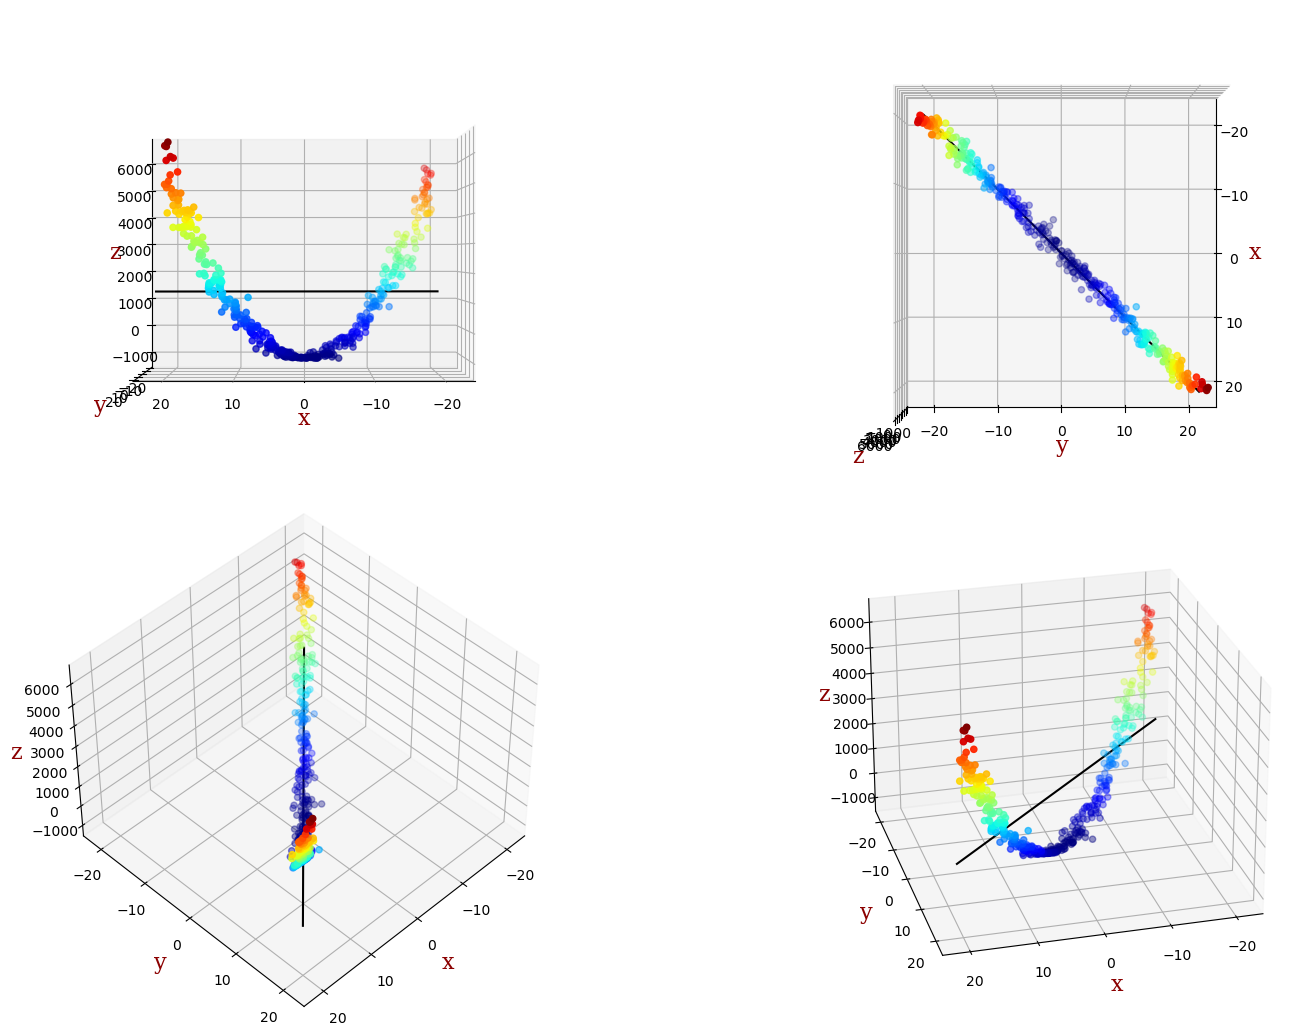

In [9]:
### Run code block to plot data and regression line ###

# Plot Curve Fit
x_fit = np.linspace(-21,21,400)
y_fit = x_fit

test_df = pd.DataFrame({'feature_1': x_fit,
                        'feature_2': y_fit})

z_fit = lin_reg.predict(test_df)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#===============
#  First subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## Perform Polynomial Regression
Next, let's see what happens when we perform a polynomial transformation on our features.

In [10]:
#Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=False) #Create a 2nd_degree polynomial instance


#Transform data and assign X_train_transformed
X_train_transformed=poly.fit_transform(X_train)

In [11]:
# get feature names
poly.get_feature_names_out(X_train.columns)

array(['feature_1', 'feature_2', 'feature_1^2', 'feature_1 feature_2',
       'feature_2^2'], dtype=object)

We have created a new feature matrix that comprises all possible polynomial combinations of the input features, with degrees less than or equal to the specified degree.  Notice that we have the following combinations of features: feature_1, feature_2, feature_1 squared, feature_1 times feature_2, and feature_2 squared.  When applying a polynomial transformation to a dataset, especially one with a large number of features, it's crucial to exercise caution. This is because the transformation can lead to a significant increase in the number of features, potentially causing issues related to feature explosion.

In [12]:
#Create variabl poly_reg
poly_reg=LinearRegression()

poly_reg.fit(X_train_transformed, y_train) #Fit model using X_train_transformed and y_train data.

LinearRegression()

In [13]:
#4-fold cross validation
cv_poly=np.sqrt(-cross_val_score(poly_reg,X_train_transformed,y_train,scoring="neg_mean_squared_error",cv=4))

#Convert cross-validation scores as series
poly_reg_cv_stats=pd.Series(cv_poly).describe()
poly_reg_cv_stats

count    4.000000
mean     0.995669
std      0.074375
min      0.897165
25%      0.964417
50%      1.006615
75%      1.037868
max      1.072281
dtype: float64

Wow! Observe the substantial reduction in the mean RMSE score when compared to the standard linear regression model. Of course that should not be a surprise considering our data's second-degree polynomial shape.

Now, let's visualize this regression line and assess how well it conforms to our data.

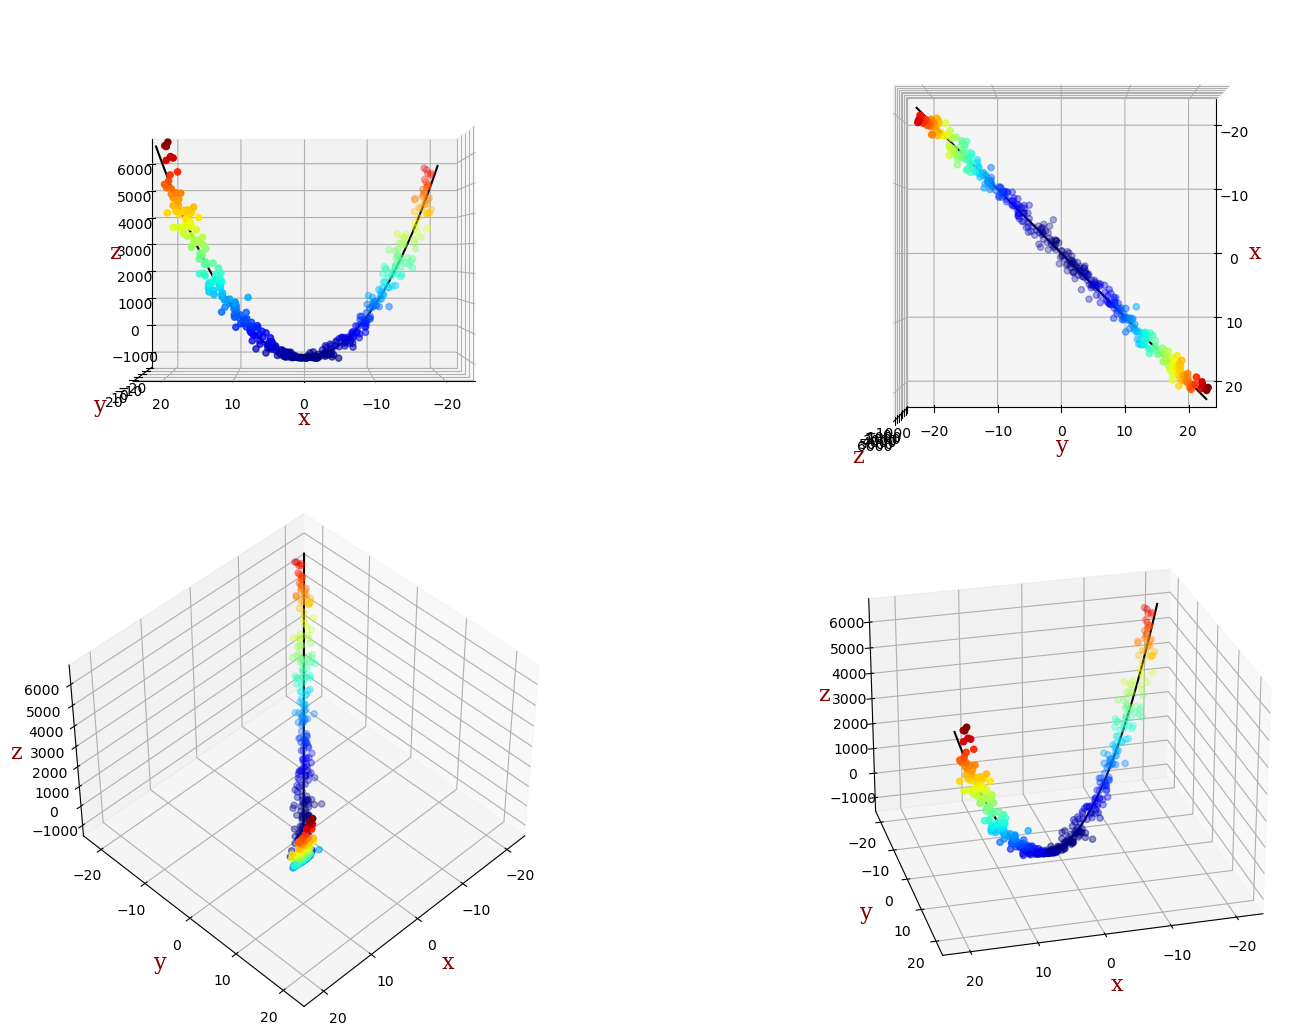

In [14]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,400)
y_fit = x_fit

test_df_poly = pd.DataFrame({'feature_1': x_fit,
                        'feature_2': y_fit})

poly_test_df = poly.transform(test_df_poly)
poly_test_df = pd.DataFrame(poly_test_df)

z_fit = poly_reg.predict(poly_test_df)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=[18, 10])

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

#===============
#  First subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(0, 90)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Second subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.view_init(90, 0)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)
    
#===============
# Third subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.view_init(45, 45)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

#===============
# Fourth subplot
#===============

# set up the axes for the first plot
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(25, 75)

ax.scatter3D(feature_1, feature_2, target, c=target, cmap='jet');
ax.plot3D(x_fit, y_fit, z_fit, '-k');

ax.set_xlabel('x',fontdict=font)
ax.set_ylabel('y',fontdict=font)
ax.set_zlabel('z',fontdict=font)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.show()

## SVM with Polynomial Kernel
Now that we've seen the strong fit of our polynomial regression model with our data, let's explore the application of the Support Vector Machine regression algorithm to compare the results. We'll employ grid search to identify the optimal hyperparameters for C and epsilon.

In [15]:
#Import SVR, GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm=SVR(kernel="poly",degree=2) #Set kernel to poly and degree=2

grid={'C':[.01,10,100],'epsilon':[.001,.10,.50,1]} #Setting up hyperparameters

grid_search_cv_svm=GridSearchCV(svm,grid,cv=4,verbose=1) #GridSearch cv=4

grid_search_cv_svm.fit(X_train,y_train)

svm_model=grid_search_cv_svm.best_estimator_ #Save best model from GridSearch
svm_model

Fitting 4 folds for each of 12 candidates, totalling 48 fits


SVR(C=100, degree=2, epsilon=0.001, kernel='poly')

In [19]:
#Perform 4-fold cross validation
svm_cv_score=np.sqrt(-cross_val_score(svm_model,X_train_transformed,y_train,scoring="neg_mean_squared_error",cv=4))

svm_cv_stats=pd.Series(svm_cv_score).describe()
svm_cv_stats

count      4.000000
mean     598.122259
std       20.479663
min      575.258952
25%      588.056648
50%      596.355973
75%      606.421583
max      624.518137
dtype: float64

The Support Vector Machines model doesn't perform as well as the polynomial regression model but it still performs drastically better than the standard linear regression model.  Since the polynomial regression model performs the best, we will continue using that model below.

## True Model Parameters
In the data description section I mentioned that the model will come close to the true model parameters, but due to the noise in the data, it will not be exact.  First, let's run the code below to see the model parameters for the polynomial regression model.

In [17]:
# suppress scientific notation to make values easier to see
np.set_printoptions(suppress=True)

print("Computed Model Coefficients: ", poly_reg.coef_)
print("Computed Model Intercept : ", poly_reg.intercept_)

Computed Model Coefficients:  [ 7.96685049  0.03317992  0.00720856 -0.0176788  16.0099275 ]
Computed Model Intercept :  -999.9161615275912


Typically, in real-world scenarios, we wouldn't have access to the true model parameters. However, in this case, because we generated the data, we know that the actual model coefficients were 8 and 16, with an intercept of -1000. After eliminating coefficients that are close to zero, it is evident that our model closely approximates the true model parameters.

## Final Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error

#Transform the data using the poly features
X_test_transformed=poly.fit_transform(X_test)

#Generate predictions on your transformed test set and name these predictions final_predictions
final_predictions=poly_reg.predict(X_test_transformed) 

#Calculate the final RMSE metric and round the result to two decimal places. Store the final RMSE value as final_rmse.
final_rmse=round(mean_squared_error(y_test,final_predictions,squared=False),2)